# Análisis del Acero 

### Descargar el Histórico
#### https://www.wsj.com/market-data/quotes/index/XX/STEEL/historical-prices

#### https://builtin.com/data-science/time-series-forecasting-python


In [1]:
import pandas as pd
import datetime

In [2]:
steel = pd.read_csv('./steel_2010_221101.csv')
steel

,Date,Open,High,Low,Close
0,10/31/22,1515.46,1540.19,1502.85,1527.60
1,10/28/22,1549.91,1549.91,1495.24,1515.46
2,10/27/22,1569.01,1569.01,1540.51,1549.92
3,10/26/22,1549.37,1598.02,1546.81,1569.01
4,10/25/22,1545.64,1556.36,1516.04,1549.37
...,...,...,...,...,...
3223,01/08/10,1819.66,1872.38,1819.66,1866.62
3224,01/07/10,1827.25,1827.25,1794.30,1819.66
3225,01/06/10,1785.33,1834.36,1783.68,1827.25
3226,01/05/10,1770.72,1796.94,1767.13,1785.33


In [3]:
steel = steel.drop(columns=['Open', 'Low', 'Close'])
steel = steel.rename(columns={"High": "STEEL"})

In [4]:
steel['Date'] = steel['Date'].str[0:2]+'/'+steel['Date'].str[3:5]+'/20'+steel['Date'].str[6:9]

In [5]:
steel.describe()

,STEEL
count,3228.000000
mean,1272.399777
std,360.317227
min,456.510000
25%,1036.320000
50%,1241.275000
75%,1510.945000
max,2415.200000


In [6]:
steel['Date'] = pd.to_datetime(steel['Date'], format="%m/%d/%Y")
#steel

In [7]:
steel.index = pd.to_datetime(steel['Date'], format='%Y-%m-%d')
steel.index

DatetimeIndex(['2022-10-31', '2022-10-28', '2022-10-27', '2022-10-26',
               '2022-10-25', '2022-10-24', '2022-10-21', '2022-10-20',
               '2022-10-19', '2022-10-18',
               ...
               '2010-01-15', '2010-01-14', '2010-01-13', '2010-01-12',
               '2010-01-11', '2010-01-08', '2010-01-07', '2010-01-06',
               '2010-01-05', '2010-01-04'],
              dtype='datetime64[ns]', name='Date', length=3228, freq=None)

In [8]:
del steel['Date']

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set()

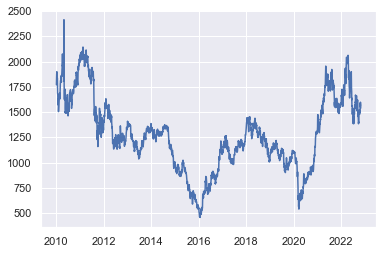

In [11]:
plt.plot(steel.index, steel['STEEL'], )

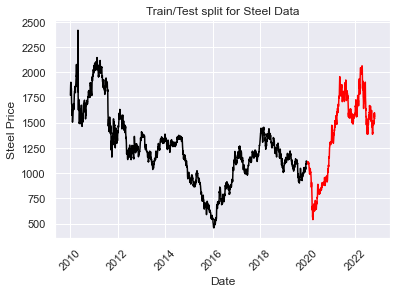

In [12]:
train = steel[steel.index <= pd.to_datetime("2020-01-01", format='%Y-%m-%d')]
test = steel[steel.index >= pd.to_datetime("2020-01-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Steel Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Steel Data")
plt.show()

### Autoregressive Moving Average (ARMA)

In [13]:
from pandas import Int64Index as NumericIndex
from statsmodels.tsa.statespace.sarimax import SARIMAX

/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_3440/3503111050.py:1: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [14]:
y = train['STEEL']

In [15]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A da

In [16]:
ARMAmodel = ARMAmodel.fit()

/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49024D+03    |proj g|=  3.29968D+03

At iterate    5    f=  1.68540D+01    |proj g|=  2.36610D+01

At iterate   10    f=  5.91174D+00    |proj g|=  9.84408D-01

At iterate   15    f=  4.80819D+00    |proj g|=  4.58148D-02

At iterate   20    f=  4.71832D+00    |proj g|=  8.33415D-03

At iterate   25    f=  4.70882D+00    |proj g|=  1.53400D-03

At iterate   30    f=  4.70674D+00    |proj g|=  1.76549D-03

At iterate   35    f=  4.70656D+00    |proj g|=  4.96358D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [17]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


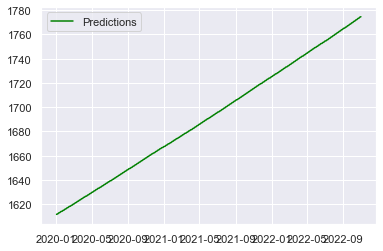

In [18]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["STEEL"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  475.69687962215926


In [20]:
from statsmodels.tsa.arima.model import ARIMA

/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A da

RMSE:  655.0946290506943


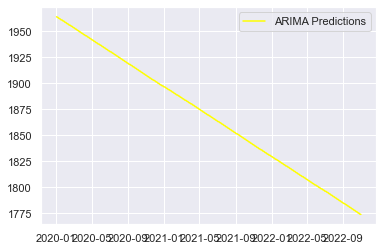

In [21]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["STEEL"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A da

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99401D+00    |proj g|=  4.57397D-01

At iterate    5    f=  5.61006D+00    |proj g|=  1.51730D-02

At iterate   10    f=  5.58907D+00    |proj g|=  2.80696D-02

At iterate   15    f=  5.37424D+00    |proj g|=  5.56826D-02

At iterate   20    f=  5.20858D+00    |proj g|=  1.91257D-01

At iterate   25    f=  5.18522D+00    |proj g|=  1.56096D-02

At iterate   30    f=  5.18436D+00    |proj g|=  1.62353D-02

At iterate   35    f=  5.18242D+00    |proj g|=  8.39918D-04

At iterate   40    f=  5.18240D+00    |proj g|=  2.41181D-03

At iterate   45    f=  5.18026D+00    |proj g|=  1.46844D-02


/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.13419D+00    |proj g|=  1.41785D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     96      1     0     0   1.418D-01   5.134D+00
  F =   5.1341931381940933     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/anaconda3/envs/kerasTensor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


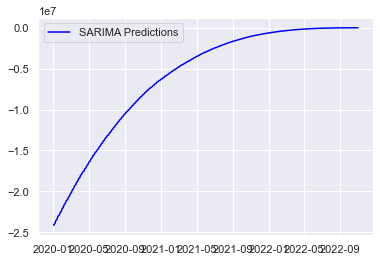

In [22]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()